## Naive Bayes' Classifier

#### Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATASET_URL = 'https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv'
df = pd.read_csv(DATASET_URL)
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NaN,C85,NaN,C123,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

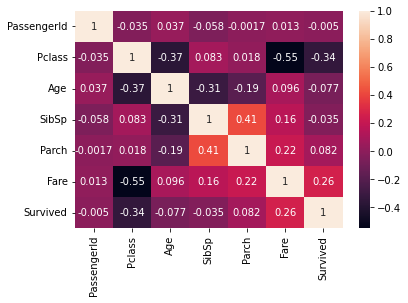

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 
              'Parch', 'Ticket', 'Cabin', 
              'Embarked'], axis=1)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [8]:
df['Sex'] = pd.get_dummies(df['Sex'])['female']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    uint8  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 28.8 KB


In [10]:
df.describe()

,Pclass,Sex,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,32.204208,0.383838
std,0.836071,0.477990,14.526497,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,7.910400,0.000000
50%,3.000000,0.000000,28.000000,14.454200,0.000000
75%,3.000000,1.000000,38.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


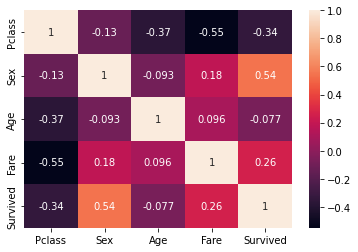

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

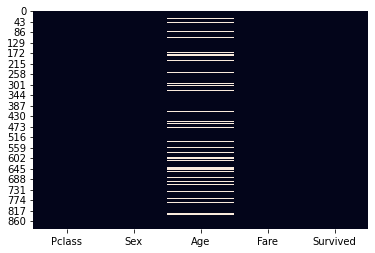

In [12]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [13]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [16]:
df.describe()

,Pclass,Sex,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,32.204208,0.383838
std,0.836071,0.477990,13.002015,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.910400,0.000000
50%,3.000000,0.000000,29.699118,14.454200,0.000000
75%,3.000000,1.000000,35.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,512.329200,1.000000


In [17]:
X = df.drop('Survived', axis=1)
y = df['Survived']

#### Modelling

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [20]:
model.fit(X_train, y_train)

GaussianNB()

#### Evaluation

In [21]:
model.score(X_test,y_test)

0.7649253731343284

In [22]:
import numpy as np

pd.DataFrame({
    'Predicted': model.predict(X_test[:10]), 
    'Probability': [np.max(x) for x in model.predict_proba(X_test[:10])],
    'Truth': y_test[:10]
}) 

,Predicted,Probability,Truth
863,1,0.853536,0
492,0,0.718832,0
331,0,0.752215,0
271,0,0.966196,1
243,0,0.967990,0
837,0,0.970872,0
241,0,0.502469,1
97,1,0.558019,1
81,0,0.971028,1
453,1,0.890606,1


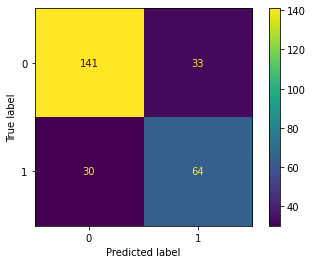

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
CM.from_predictions(y_test, model.predict(X_test))
plt.show()